Importing Libary

In [2]:
import os
import random
import numpy as np 
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import math

TRAIN_DIR = 'M:/CIFAR-10-images-master/train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)
print(TRAIN_DIR)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
M:/CIFAR-10-images-master/train


In [3]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|██████████| 5000/5000 [00:34<00:00, 144.83it/s]

50000


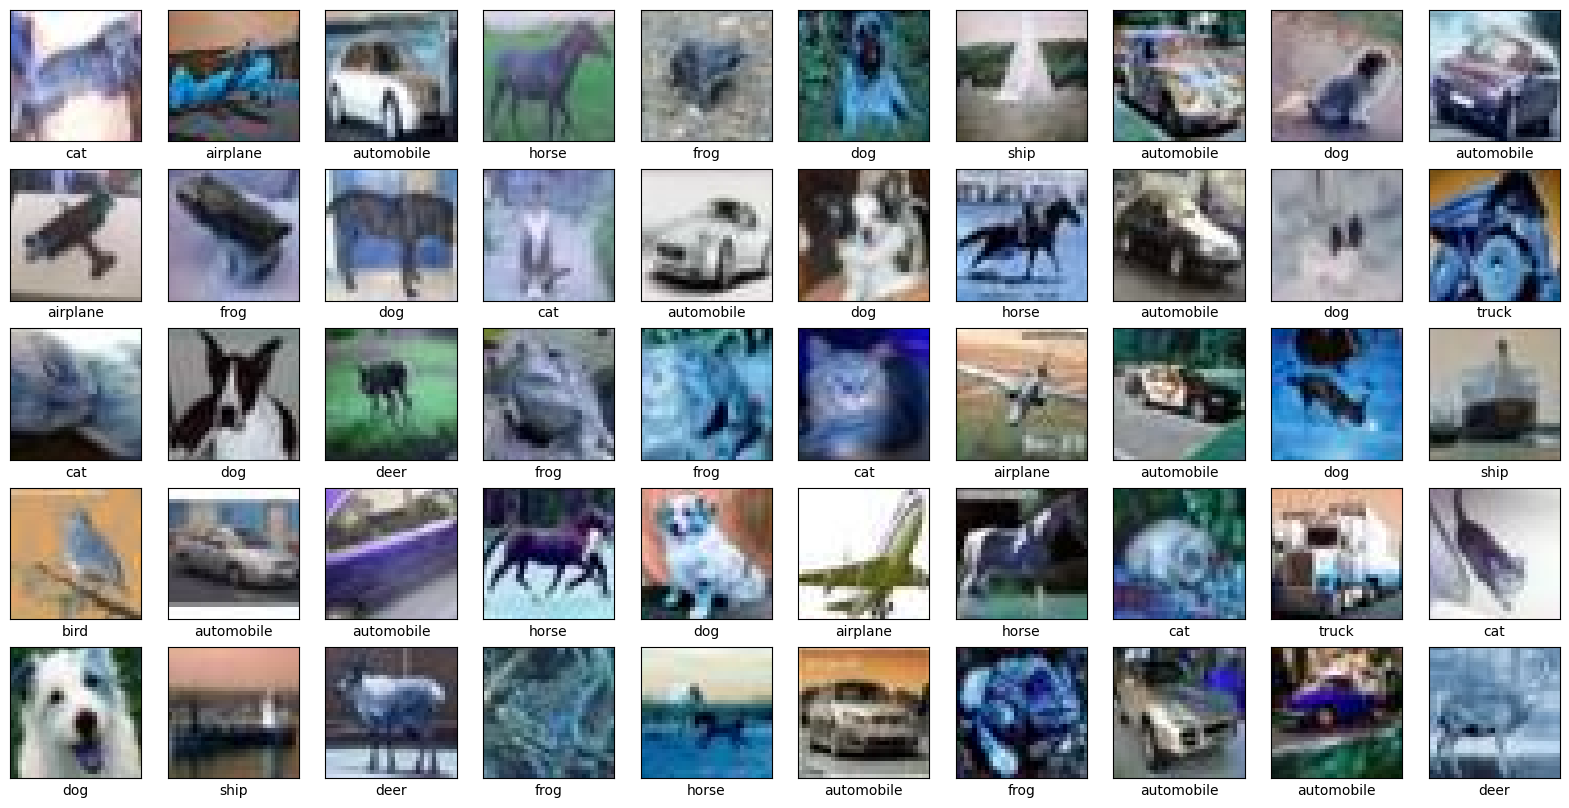

In [4]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [5]:
f0 = TRAIN_DATA[:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

Computing midpoint accuracies for L1 and L2 distances

In [6]:
k_values = [1, 3, 5, 7, 9]

midpoint_l1_accuracies = []
midpoint_l2_accuracies = []

for i in range(5):
    if i==0:
        train = f1+f2+f3+f4
        validation = f0
    elif i==1:
        train = f0+f2+f3+f4
        validation = f1
    elif i==2:
        train = f0+f1+f3+f4
        validation = f2
    elif i==3:
        train = f0+f1+f2+f4
        validation = f3
    elif i==4:
        train = f0+f1+f2+f3
        validation = f4

    l1_accuracies = []
    l2_accuracies = []
    for k in k_values:
        l1_correct = 0
        l2_correct = 0
        total = 0
        for v in tqdm(validation):
            v_img = v[0]
            v_label = v[1]
            l1_scores = []
            l2_scores = []
            for t in train:
                t_img = t[0]
                t_label = t[1]
                # L1 distance
                l1_dist = np.sum(np.abs(t_img - v_img))
                l1_scores.append((l1_dist, t_label))
                # L2 distance
                l2_dist = np.sqrt(np.sum((t_img - v_img) ** 2))
                l2_scores.append((l2_dist, t_label))
            sorted_l1_scores = sorted(l1_scores, key=lambda x: x[0])[:k]
            l1_neighbors = [s[1] for s in sorted_l1_scores]
            l1_prediction = max(set(l1_neighbors), key=l1_neighbors.count)

            sorted_l2_scores = sorted(l2_scores, key=lambda x: x[0])[:k]
            l2_neighbors = [s[1] for s in sorted_l2_scores]
            l2_prediction = max(set(l2_neighbors), key=l2_neighbors.count)
            if l1_prediction == v_label:
                l1_correct += 1
            if l2_prediction == v_label:
                l2_correct += 1

            total += 1

        l1_accuracy = l1_correct / total
        l1_accuracies.append(l1_accuracy)

        l2_accuracy = l2_correct / total
        l2_accuracies.append(l2_accuracy)

        print("Fold {}, k = {}, L1 accuracy = {:.2f}%, L2 accuracy = {:.2f}%".format(i, k, l1_accuracy * 100, l2_accuracy * 100))

    min_l1_accuracy = min(l1_accuracies)
    max_l1_accuracy = max(l1_accuracies)
    midpoint_l1_accuracy = (min_l1_accuracy + max_l1_accuracy) / 2
    midpoint_l1_accuracies.append(midpoint_l1_accuracy)

    min_l2_accuracy = min(l2_accuracies)
    max_l2_accuracy = max(l2_accuracies)
    midpoint_l2_accuracy = (min_l2_accuracy + max_l2_accuracy) / 2
    midpoint_l2_accuracies.append(midpoint_l2_accuracy)

    print("Midpoint L1 accuracy for Fold {} = {:.2f}%, Midpoint L2 accuracy for Fold {} = {:.2f}%".format(i, midpoint_l1_accuracy * 100, i, midpoint_l2_accuracy * 100))

100%|██████████| 1000/1000 [01:49<00:00,  9.13it/s]


Fold 0, k = 1, L1 accuracy = 18.60%, L2 accuracy = 17.30%


100%|██████████| 1000/1000 [01:47<00:00,  9.32it/s]


Fold 0, k = 3, L1 accuracy = 18.60%, L2 accuracy = 15.50%


100%|██████████| 1000/1000 [01:47<00:00,  9.28it/s]


Fold 0, k = 5, L1 accuracy = 19.40%, L2 accuracy = 16.50%


100%|██████████| 1000/1000 [01:47<00:00,  9.33it/s]


Fold 0, k = 7, L1 accuracy = 19.30%, L2 accuracy = 17.80%


100%|██████████| 1000/1000 [01:50<00:00,  9.05it/s]


Fold 0, k = 9, L1 accuracy = 19.00%, L2 accuracy = 17.70%
Midpoint L1 accuracy for Fold 0 = 19.00%, Midpoint L2 accuracy for Fold 0 = 16.65%


100%|██████████| 1000/1000 [01:48<00:00,  9.24it/s]


Fold 1, k = 1, L1 accuracy = 19.30%, L2 accuracy = 20.00%


100%|██████████| 1000/1000 [01:47<00:00,  9.28it/s]


Fold 1, k = 3, L1 accuracy = 18.50%, L2 accuracy = 17.80%


100%|██████████| 1000/1000 [01:47<00:00,  9.30it/s]


Fold 1, k = 5, L1 accuracy = 18.80%, L2 accuracy = 20.10%


100%|██████████| 1000/1000 [01:48<00:00,  9.25it/s]


Fold 1, k = 7, L1 accuracy = 19.20%, L2 accuracy = 20.20%


100%|██████████| 1000/1000 [01:46<00:00,  9.40it/s]


Fold 1, k = 9, L1 accuracy = 18.00%, L2 accuracy = 20.50%
Midpoint L1 accuracy for Fold 1 = 18.65%, Midpoint L2 accuracy for Fold 1 = 19.15%


100%|██████████| 1000/1000 [01:53<00:00,  8.83it/s]


Fold 2, k = 1, L1 accuracy = 17.70%, L2 accuracy = 18.50%


100%|██████████| 1000/1000 [01:46<00:00,  9.37it/s]


Fold 2, k = 3, L1 accuracy = 18.30%, L2 accuracy = 16.00%


100%|██████████| 1000/1000 [01:46<00:00,  9.35it/s]


Fold 2, k = 5, L1 accuracy = 18.60%, L2 accuracy = 18.30%


100%|██████████| 1000/1000 [01:46<00:00,  9.36it/s]


Fold 2, k = 7, L1 accuracy = 18.10%, L2 accuracy = 18.80%


100%|██████████| 1000/1000 [01:48<00:00,  9.19it/s]


Fold 2, k = 9, L1 accuracy = 17.60%, L2 accuracy = 18.70%
Midpoint L1 accuracy for Fold 2 = 18.10%, Midpoint L2 accuracy for Fold 2 = 17.40%


100%|██████████| 1000/1000 [01:49<00:00,  9.16it/s]


Fold 3, k = 1, L1 accuracy = 17.40%, L2 accuracy = 18.80%


100%|██████████| 1000/1000 [01:48<00:00,  9.26it/s]


Fold 3, k = 3, L1 accuracy = 18.70%, L2 accuracy = 17.90%


100%|██████████| 1000/1000 [01:47<00:00,  9.32it/s]


Fold 3, k = 5, L1 accuracy = 20.40%, L2 accuracy = 18.20%


100%|██████████| 1000/1000 [01:49<00:00,  9.09it/s]


Fold 3, k = 7, L1 accuracy = 18.50%, L2 accuracy = 19.60%


100%|██████████| 1000/1000 [01:49<00:00,  9.10it/s]


Fold 3, k = 9, L1 accuracy = 19.20%, L2 accuracy = 19.80%
Midpoint L1 accuracy for Fold 3 = 18.90%, Midpoint L2 accuracy for Fold 3 = 18.85%


100%|██████████| 1000/1000 [01:52<00:00,  8.89it/s]


Fold 4, k = 1, L1 accuracy = 18.40%, L2 accuracy = 18.50%


100%|██████████| 1000/1000 [01:51<00:00,  9.00it/s]


Fold 4, k = 3, L1 accuracy = 19.20%, L2 accuracy = 17.60%


100%|██████████| 1000/1000 [01:50<00:00,  9.01it/s]


Fold 4, k = 5, L1 accuracy = 19.40%, L2 accuracy = 19.20%


100%|██████████| 1000/1000 [01:52<00:00,  8.92it/s]


Fold 4, k = 7, L1 accuracy = 18.00%, L2 accuracy = 18.90%


100%|██████████| 1000/1000 [01:51<00:00,  8.98it/s]

Fold 4, k = 9, L1 accuracy = 18.90%, L2 accuracy = 19.10%
Midpoint L1 accuracy for Fold 4 = 18.70%, Midpoint L2 accuracy for Fold 4 = 18.40%


Plotting the graph

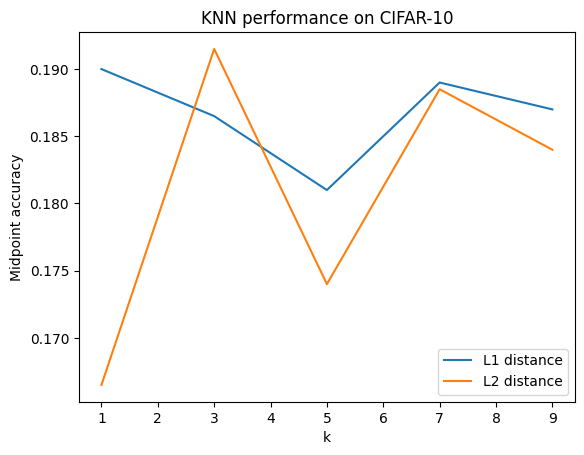

In [7]:

plt.plot(k_values, midpoint_l1_accuracies, label='L1 distance')
plt.plot(k_values, midpoint_l2_accuracies, label='L2 distance')
plt.xlabel('k')
plt.ylabel('Midpoint accuracy')
plt.title('KNN performance on CIFAR-10')
plt.legend()
plt.show()